# Studying Sparse - Dense retrieval

This notebook studies **sparse - dense retrieval** using [scifact](https://github.com/allenai/scifact) dataset.

In [1]:
DATASET = 'scidocs'

Downloading dataset

In [2]:
from assignment2.model import BEIRDatasetDownload

downloader = BEIRDatasetDownload(data_name=DATASET)
downloader.download()

## 1. Vectorization

We use a own-built vectorizer class to parse docuements and queries and perform both sparse and dense vectorization.

In [2]:
from assignment2.model import DocumentVectorizer

In [3]:
vectorizer = DocumentVectorizer(data_name=DATASET)

### 1.1 Parsing

Parsing documents and queries:

In [4]:
%%time
vectorizer.parse()

Parsing documents
Parsing queries
Wall time: 8 s


Document example:

In [5]:
vectorizer.documents[0].content

'An evolutionary recurrent network which automates the design of recurrent neural/fuzzy networks using a new evolutionary learning algorithm is proposed in this paper. This new evolutionary learning algorithm is based on a hybrid of genetic algorithm (GA) and particle swarm optimization (PSO), and is thus called HGAPSO. In HGAPSO, individuals in a new generation are created, not only by crossover and mutation operation as in GA, but also by PSO. The concept of elite strategy is adopted in HGAPSO, where the upper-half of the best-performing individuals in a population are regarded as elites. However, instead of being reproduced directly to the next generation, these elites are first enhanced. The group constituted by the elites is regarded as a swarm, and each elite corresponds to a particle within it. In this regard, the elites are enhanced by PSO, an operation which mimics the maturing phenomenon in nature. These enhanced elites constitute half of the population in the new generation,

Query example:

In [6]:
vectorizer.queries[0].content

'A Direct Search Method to solve Economic Dispatch Problem with Valve-Point Effect'

### 1.2 Tokenization

Performing tokenization:
- removing punctuation
- lowercase
- stop-words removal
- removing numerics and west asia chars
- stemming and lemming

In [7]:
%%time
vectorizer.tokenize()

Tokenizing documents
Tokenizing queries
Wall time: 1min 31s


Tokenized document example:

In [8]:
vectorizer.documents[0].tokenized_content

'evolutionari recurr network autom design recurr neuralfuzzi network use new evolutionari learn algorithm propos paper new evolutionari learn algorithm base hybrid genet algorithm ga particl swarm optim pso thus call hgapso hgapso individu new generat creat crossov mutat oper ga also pso concept elit strategi adopt hgapso upperhalf bestperform individu popul regard elit howev instead reproduc direct next generat elit first enhanc group constitut elit regard swarm elit correspond particl within regard elit enhanc pso oper mimic matur phenomenon natur enhanc elit constitut half popul new generat wherea half generat perform crossov mutat oper enhanc elit hgapso appli recurr neuralfuzzi network design follow recurr neural network fulli connect recurr neural network design appli tempor sequenc product problem recurr fuzzi network design takagisugenokangtyp recurr fuzzi network design appli dynam plant control perform hgapso compar ga pso recurr network design problem demonstr superior'

Query example:

In [9]:
vectorizer.queries[0].tokenized_content

'direct search method solv econom dispatch problem valvepoint effect'

### 1.3 Sparse vectorization

Sparse vectorization of documents and queries

In [10]:
%%time
vectorizer.sparse_vectorize()

Learning vocabulary idf 
Generating document sparse vector 
Generating query sparse vector 
Wall time: 4.02 s


In [11]:
vectorizer.sparse_document_vectors.shape

(25657, 72797)

In [12]:
vectorizer.sparse_query_vectors.shape

(1000, 72797)

We have a total of **72797** different terms.

### 1.4 Dense vectorization

Dense vectorization of documents and queries:

In [13]:
%%time
vectorizer.dense_vectorize()

Generating document dense vector 
Generating query dense vector 
Wall time: 39min 37s


In [14]:
vectorizer.dense_document_vectors.shape

(25657, 384)

In [15]:
vectorizer.dense_query_vectors.shape

(1000, 384)

### 1. 5 Saving

We store vectors to disk in order to maintain vectors available without need to process them again

In [16]:
vectorizer.save()

## 2. Computing scores

We use a own-built vectorizer class compute **sparse scorse**, **dense scores** and **full scores** for each query.

We exploit results coming from previous computations

In [17]:
from assignment2.model import ScoresComputation

In [18]:
%%time
scores = ScoresComputation(data_name=DATASET)

Wall time: 672 ms


### 2.1 Computing sparse scores

Sparse scores:

In [19]:
scores.sparse_scores

array([[0.01654558, 0.29327828, 0.02232494, ..., 0.06400272, 0.02856901,
        0.0472166 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01030629],
       [0.        , 0.01481859, 0.        , ..., 0.02375188, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02410214, 0.07131794, 0.01363618, ..., 0.00822411, 0.10741076,
        0.06407585],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### 2.2 Computing dense scores

Dense scores:

In [20]:
scores.dense_scores

array([[ 0.2328575 ,  0.58856374,  0.20024735, ...,  0.13516934,
         0.17569868,  0.01130756],
       [ 0.0348883 , -0.01995574,  0.08386616, ...,  0.02022157,
        -0.01511076,  0.05228513],
       [ 0.08541328,  0.08267853,  0.11226956, ...,  0.15876244,
         0.07492685,  0.01590474],
       ...,
       [ 0.01517473,  0.09707945,  0.13157089, ...,  0.12351662,
         0.20350704,  0.13687542],
       [ 0.19029588,  0.05077631,  0.11237385, ...,  0.25521752,
         0.2590503 ,  0.31906623],
       [ 0.03265191, -0.02026129,  0.10684619, ...,  0.05608293,
         0.00700339,  0.02312852]], dtype=float32)

### 2.3 Computing full scores

Full scores are actually the sum of the previous two results

In [21]:
scores.full_scores

array([[ 0.24940307,  0.88184202,  0.22257229, ...,  0.19917207,
         0.20426769,  0.05852417],
       [ 0.0348883 , -0.01995574,  0.08386616, ...,  0.02022157,
        -0.01511076,  0.06259142],
       [ 0.08541328,  0.09749713,  0.11226956, ...,  0.18251432,
         0.07492685,  0.01590474],
       ...,
       [ 0.01517473,  0.09707945,  0.13157089, ...,  0.12351662,
         0.20350704,  0.13687542],
       [ 0.21439802,  0.12209425,  0.12601004, ...,  0.26344163,
         0.36646107,  0.38314207],
       [ 0.03265191, -0.02026129,  0.10684619, ...,  0.05608293,
         0.00700339,  0.02312852]])

### 1.4 Saving

We store scores to disk:

In [22]:
scores.save()

## 3. Top-K analysis of recall

We use two own-built classes for recall evaluation and analysis

In [23]:
from assignment2.model import RecallEvaluation, RecallAnalysis

### 3.1 Choise of K

Top-k is actually an hyperparameter of the model. We study a possible different behaviour varying the number of relevant documents we consider.

In [24]:
K = [3, 10, 50, 100, 500, 1000]

### 3.2 Evaluation

We study recall trend incrementing the value of **k'**, the number of documents with highest score considering sparse and dense scores alone. Iterations stop when 100% recall is reached.

We consider 90% recall enough: in the plot we also highlight k' value to reach at least 0.9 recall.

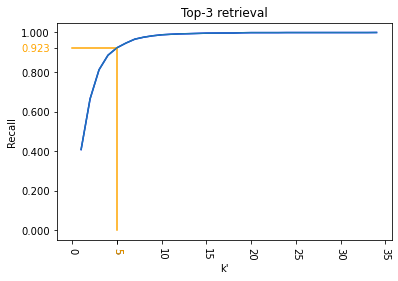

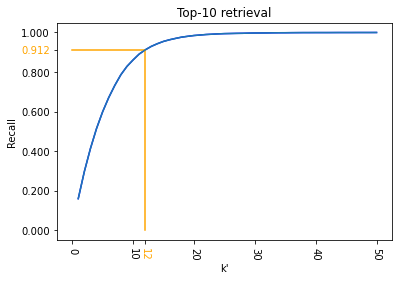

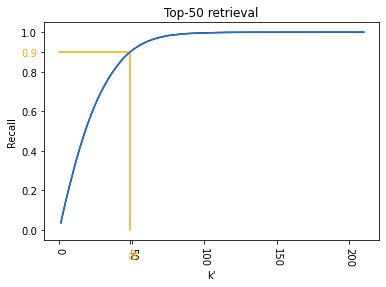

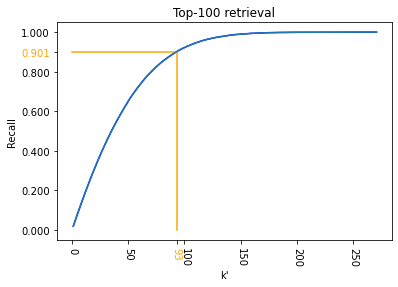

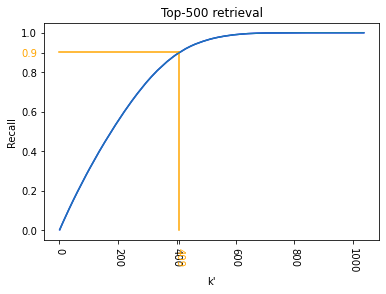

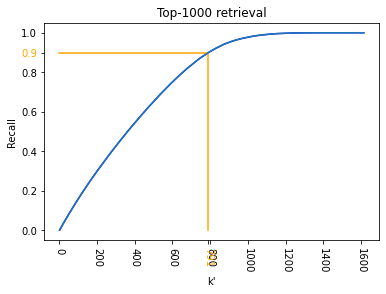

In [25]:
for k in K:
    rec_eval = RecallEvaluation(data_name=DATASET, k=k)
    rec_eval.evaluate()
    rec_eval.plot(save=True)
    rec_eval.save()

### 3.3 Studying interaction between k' and recall

We exploit previous results to study the interaction between **k'** and **recall** in different models (with fixed k)

In [26]:
ra = RecallAnalysis(data_name=DATASET)

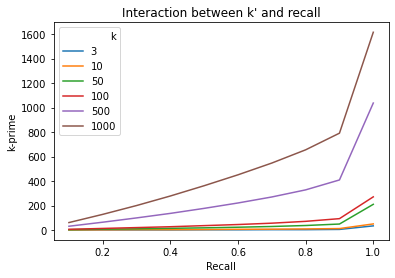

In [27]:
ra.plot(save=True)